In [ ]:
!git clone https://github.com/abhidya/jokes.git

In [1]:
import random
import pandas as pd
# import modin.pandas as pd
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from math import isnan
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import numpy as np
pd.set_option('display.max_columns', 155)  



In [2]:
## IF using Google Colab

df = pd.read_csv("/content/jokes/train_final.csv")
submission = pd.read_csv("/content/jokes/test_final.csv")


## If using kaggle kernel
# df = pd.read_csv("../input/utkml/train_final.csv")
# submission = pd.read_csv("../input/utkml/test_final.csv")

## IF running locally from the github repo
# df = pd.read_csv("train_final.csv")
# submission = pd.read_csv("test_final.csv")


# EDA:  Exploratory Data Analysis


In [3]:
submission.describe()

,user_id,JOKE:5,JOKE:7,JOKE:8,JOKE:13,JOKE:15,JOKE:16,JOKE:17,JOKE:18,JOKE:19,JOKE:20,JOKE:21,JOKE:22,JOKE:23,JOKE:24,JOKE:25,JOKE:26,JOKE:27,JOKE:28,JOKE:29,JOKE:30,JOKE:31,JOKE:32,JOKE:33,JOKE:34,JOKE:35,JOKE:36,JOKE:37,JOKE:38,JOKE:39,JOKE:40,JOKE:41,JOKE:42,JOKE:43,JOKE:44,JOKE:45,JOKE:46,JOKE:47,JOKE:48,JOKE:49,JOKE:50,JOKE:51,JOKE:52,JOKE:53,JOKE:54,JOKE:55,JOKE:56,JOKE:57,JOKE:58,JOKE:59,JOKE:60,JOKE:61,JOKE:62,JOKE:63,JOKE:64,JOKE:65,JOKE:66,JOKE:67,JOKE:68,JOKE:69,JOKE:70,JOKE:71,JOKE:72,JOKE:73,JOKE:74,JOKE:75,JOKE:76,JOKE:77,JOKE:78,JOKE:79,JOKE:80,JOKE:81,JOKE:82,JOKE:83,JOKE:84,JOKE:85,JOKE:86,JOKE:87,JOKE:88,JOKE:89,JOKE:90,JOKE:91,JOKE:92,JOKE:93,JOKE:94,JOKE:95,JOKE:96,JOKE:97,JOKE:98,JOKE:99,JOKE:100,JOKE:101,JOKE:102,JOKE:103,JOKE:104,JOKE:105,JOKE:106,JOKE:107,JOKE:108,JOKE:109,JOKE:110,JOKE:111,JOKE:112,JOKE:113,JOKE:114,JOKE:115,JOKE:116,JOKE:117,JOKE:118,JOKE:119,JOKE:120,JOKE:121,JOKE:122,JOKE:123,JOKE:124,JOKE:125,JOKE:126,JOKE:127,JOKE:128,JOKE:129,JOKE:130,JOKE:131,JOKE:132,JOKE:133,JOKE:134,JOKE:135,JOKE:136,JOKE:137,JOKE:138,JOKE:139,JOKE:140,JOKE:141,JOKE:142,JOKE:143,JOKE:144,JOKE:145,JOKE:146,JOKE:147,JOKE:148,JOKE:149,JOKE:150
count,14783.000000,147.000000,13444.000000,13562.000000,13101.000000,13125.000000,13067.000000,12397.000000,12413.000000,11867.000000,127.000000,2831.000000,1818.000000,1638.000000,1131.000000,2108.000000,2273.000000,86.000000,2418.000000,3469.000000,1318.000000,51.000000,5346.000000,1113.000000,2255.000000,4879.000000,3858.000000,1561.000000,2038.000000,2170.000000,1742.000000,1623.000000,2183.000000,34.000000,1210.000000,1741.000000,2350.000000,3620.000000,2692.000000,3512.000000,3905.000000,31.000000,33.000000,5477.000000,4031.000000,1363.000000,3023.000000,1273.000000,1229.000000,1480.000000,1477.000000,46.000000,3934.000000,3141.000000,1238.000000,2559.000000,3934.000000,1378.000000,3751.000000,4135.000000,1896.000000,1261.000000,4725.000000,41.000000,1159.000000,1319.000000,3770.000000,1751.000000,2265.000000,1221.000000,36.000000,2275.000000,1774.000000,2206.000000,1817.000000,1270.000000,1706.000000,2889.000000,2268.000000,6019.000000,1478.000000,2647.000000,2627.000000,3526.000000,2035.000000,2094.000000,2478.000000,3467.000000,2115.000000,1892.000000,39.000000,1229.000000,1690.000000,1446.000000,4803.000000,5138.000000,5257.000000,2778.000000,4046.000000,2372.000000,2551.000000,3528.000000,2800.000000,2193.000000,6066.000000,2331.000000,35.000000,4461.00000,2827.000000,4325.000000,2676.000000,3148.000000,2359.000000,1243.000000,1070.000000,2667.000000,3984.000000,4754.000000,2505.000000,4600.000000,2712.000000,1622.000000,3846.000000,2243.000000,3867.000000,2542.000000,1425.000000,2029.000000,3932.000000,2761.000000,1346.000000,1007.000000,2198.000000,3574.000000,2422.000000,3037.000000,1219.000000,2384.000000,3634.000000,2695.000000,4395.000000
mean,29434.675370,-1.565517,-2.372895,-1.090136,-1.083219,-1.712775,-1.924348,0.230674,-0.362870,0.355298,-0.782677,2.897194,1.242206,1.095402,-1.199576,0.980503,2.358273,2.656581,2.159897,2.769362,1.024341,2.651412,3.249305,-0.353942,0.557110,3.324812,2.821691,-0.032306,1.937902,1.708200,1.321528,-0.177666,1.560537,-0.366794,-1.083528,1.605631,1.165782,2.942142,2.585935,2.969339,3.146698,0.365968,1.085152,3.530836,2.689679,0.594563,2.453909,-0.515470,-1.618692,1.086596,0.837504,2.101826,3.125175,2.895652,-0.182429,2.325383,2.660624,-0.171513,3.177067,3.166953,1.638000,0.959456,3.398308,2.557195,-0.709742,-1.091641,2.878555,1.578282,2.311571,0.247980,2.542611,1.969701,1.184028,2.366490,2.203106,0.208867,1.502254,2.364098,2.228782,3.193650,1.621601,1.823423,1.981713,2.841928,1.805895,1.131591,2.214977,2.708020,2.248256,1.759353,1.548051,-0.275942,0.964742,0.851086,3.247565,3.533232,3.115627,2.586024,3.299087,2.059839,2.749925,2.723683,2.221659,1.459604,2.937339,1.639663,1.443714,3.17411,2.045534,2.642746,1.692216,2.296669,2.344407,-0.619218,-2.388957,2.749360,3.005815,2.893023,2.526462,3.446856,1.366602,0.697277,2.901572,1

In [4]:
df.describe()

,user_id,JOKE:5,JOKE:7,JOKE:8,JOKE:13,JOKE:15,JOKE:16,JOKE:17,JOKE:18,JOKE:19,JOKE:20,JOKE:21,JOKE:22,JOKE:23,JOKE:24,JOKE:25,JOKE:26,JOKE:27,JOKE:28,JOKE:29,JOKE:30,JOKE:31,JOKE:32,JOKE:33,JOKE:34,JOKE:35,JOKE:36,JOKE:37,JOKE:38,JOKE:39,JOKE:40,JOKE:41,JOKE:42,JOKE:43,JOKE:44,JOKE:45,JOKE:46,JOKE:47,JOKE:48,JOKE:49,JOKE:50,JOKE:51,JOKE:52,JOKE:53,JOKE:54,JOKE:55,JOKE:56,JOKE:57,JOKE:58,JOKE:59,JOKE:60,JOKE:61,JOKE:62,JOKE:63,JOKE:64,JOKE:65,JOKE:66,JOKE:67,JOKE:68,JOKE:69,JOKE:70,JOKE:71,JOKE:72,JOKE:73,JOKE:74,JOKE:75,JOKE:76,JOKE:77,JOKE:78,JOKE:79,JOKE:80,JOKE:81,JOKE:82,JOKE:83,JOKE:84,JOKE:85,JOKE:86,JOKE:87,JOKE:88,JOKE:89,JOKE:90,JOKE:91,JOKE:92,JOKE:93,JOKE:94,JOKE:95,JOKE:96,JOKE:97,JOKE:98,JOKE:99,JOKE:100,JOKE:101,JOKE:102,JOKE:103,JOKE:104,JOKE:105,JOKE:106,JOKE:107,JOKE:108,JOKE:109,JOKE:110,JOKE:111,JOKE:112,JOKE:113,JOKE:114,JOKE:115,JOKE:116,JOKE:117,JOKE:118,JOKE:119,JOKE:120,JOKE:121,JOKE:122,JOKE:123,JOKE:124,JOKE:125,JOKE:126,JOKE:127,JOKE:128,JOKE:129,JOKE:130,JOKE:131,JOKE:132,JOKE:133,JOKE:134,JOKE:135,JOKE:136,JOKE:137,JOKE:138,JOKE:139,JOKE:140,JOKE:141,JOKE:142,JOKE:143,JOKE:144,JOKE:145,JOKE:146,JOKE:147,JOKE:148,JOKE:149,JOKE:150
count,44349.000000,510.000000,44341.000000,43262.000000,42219.000000,41171.000000,40564.000000,39984.000000,38643.000000,37961.000000,427.000000,8838.000000,5517.000000,5049.000000,3444.000000,6309.000000,7082.00000,280.000000,7405.000000,10772.000000,4037.000000,179.000000,16894.000000,3445.000000,6860.000000,15405.000000,12087.000000,4692.000000,6270.000000,6625.000000,5268.000000,5022.000000,6821.000000,132.000000,3641.000000,5414.000000,7245.000000,11365.000000,8306.000000,10844.000000,12461.000000,135.000000,133.000000,17306.00000,12607.000000,4184.000000,9208.000000,3806.000000,3585.000000,4508.000000,4463.000000,174.000000,12529.000000,9853.000000,3716.000000,7850.000000,11984.000000,4117.000000,11745.000000,12815.000000,5935.00000,3825.000000,14571.000000,126.000000,3441.000000,4008.000000,11747.000000,5433.000000,6823.000000,3679.000000,131.000000,6983.000000,5545.000000,6875.000000,5654.000000,3871.000000,5267.000000,9029.000000,7090.000000,19487.000000,4513.000000,8118.000000,8105.000000,10938.000000,6369.000000,6378.000000,7644.000000,10789.000000,6491.000000,5861.000000,129.000000,3810.000000,5259.000000,4536.000000,14846.000000,16426.000000,16727.000000,8444.000000,12596.000000,7285.000000,8019.000000,10746.000000,8542.000000,6772.000000,19226.000000,6973.000000,129.000000,13809.000000,8754.000000,13551.000000,8418.000000,9715.000000,7290.000000,3819.000000,3156.000000,8092.000000,12414.000000,15286.000000,7718.000000,14661.000000,8234.000000,4968.000000,12136.000000,6884.000000,11873.000000,7860.000000,4326.000000,6349.000000,12603.000000,8553.000000,4139.000000,3065.000000,6836.000000,10946.000000,7305.000000,9465.000000,3691.000000,7335.000000,11255.000000,8244.000000,13612.000000
mean,29609.108210,-1.857765,-1.788041,-0.648899,-0.583756,-1.370181,-1.575173,0.703419,-0.130919,0.779944,-0.728733,2.973188,1.270282,1.050403,-1.036330,1.266747,2.54443,2.974664,2.125337,3.070713,1.048251,2.293140,3.516111,-0.142664,0.760317,3.566867,2.901704,0.203489,1.766988,1.726086,1.552140,0.136876,1.580978,0.473455,-0.967035,1.560912,1.346839,2.956768,2.748464,3.091978,3.258156,-0.633815,-0.155278,3.70569,2.974607,0.380292,2.474815,-0.500708,-1.325401,1.335495,1.115382,1.756069,3.310397,2.980086,-0.055550,2.574154,2.795578,0.001295,3.404584,3.235907,1.68686,1.108093,3.504036,1.493563,-0.588144,-0.797584,2.907874,1.526530,2.231304,0.304364,2.152969,2.099564,1.260593,2.453152,2.118934,0.300867,1.508459,2.404323,2.310599,3.634837,1.749497,1.962473,1.962016,2.765168,1.944533,1.202317,2.338862,2.935793,2.241686,1.981134,0.887574,-0.241453,1.212010,0.793308,3.441260,3.707565,3.342540,2.562327,3.220975,2.084826,2.763145,2.798478,2.254756,1.421530,3.201337,1.597743,1.710062,3.190983,1.952697,2.784753,1.564499,2.359732,2.609132,-0.146266,-2.112335,2.825732,3.203632,3.160403,2.58218

### Plotting the count of ratings per Joke

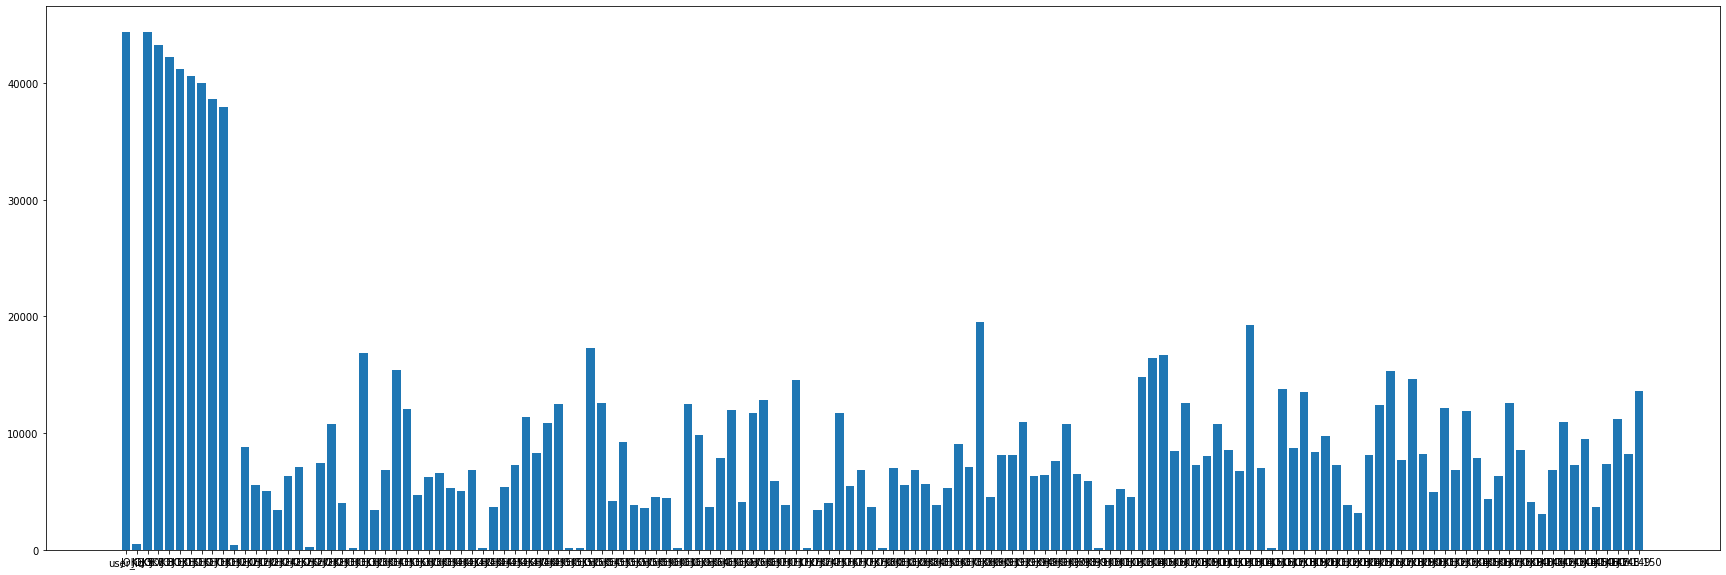

In [5]:
# #plot 

count_columns = []
count_values = []

for column in df.columns:
    count_columns.append(column)
    count_values.append(df[column].count())
   
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(count_columns, count_values);

### Plotting the Standard Deviation ratings per Joke : Sorted by Greatest to Least

In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range. [Wikipedia](https://en.wikipedia.org/wiki/Standard_deviation)

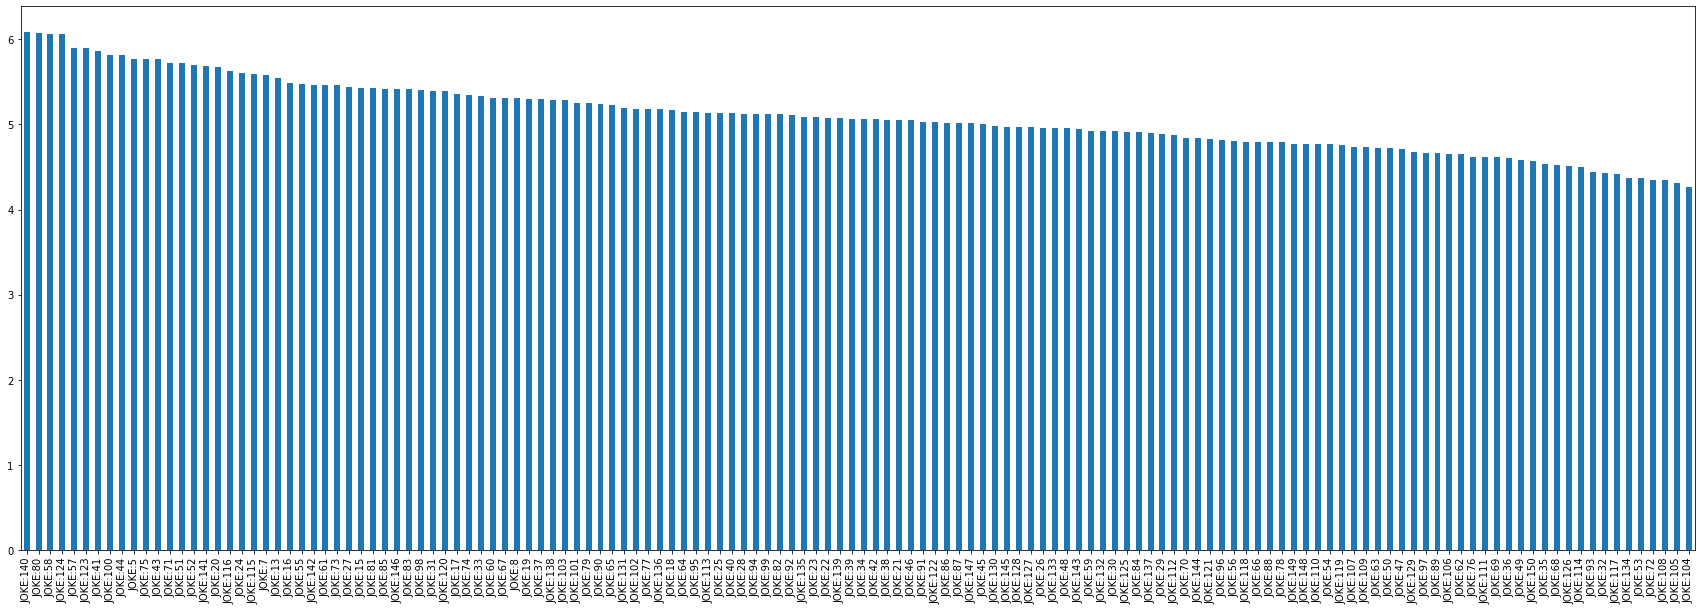

In [6]:
df.drop(["user_id"], axis=1).std().sort_values( ascending=False).plot(kind='bar',figsize=(30,10));

### Plotting the count of ratings per Joke

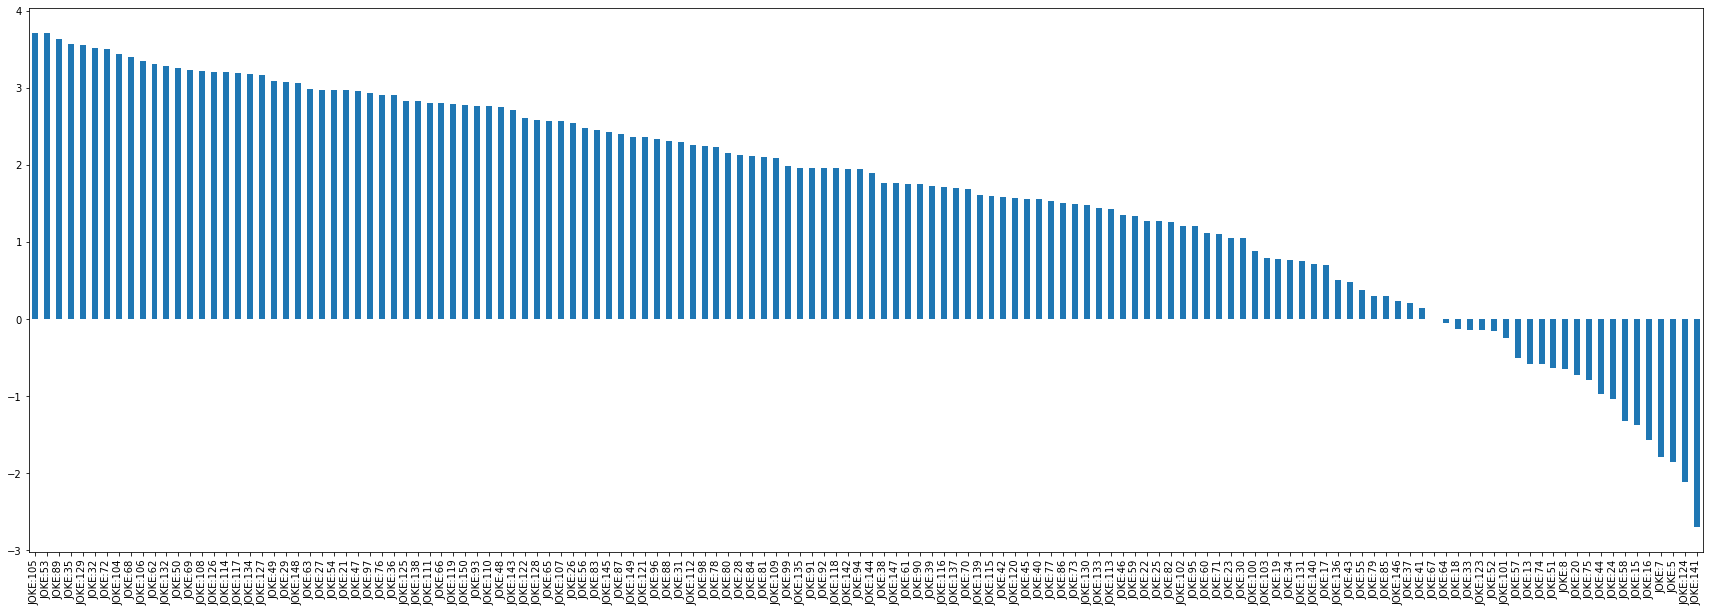

In [7]:
#predict users based on best rated joke not yet seen


df.drop(["user_id"], axis=1).mean().sort_values( ascending=False).plot(kind='bar',figsize=(30,10));

#  Solutions

### Building training and validation set

Here We use the function split_df_x_y, it takes a dataframe, returns a dataframe and list. The list returned contains the highest rated joke for every user it also replaces the rating for the top rated joke with NaN.


we will take the df create a **train** and a **test** by using sklearn's *train_test_split* method, 

we will then use *split_df_x_y* to create **train, train_y** and **test, test_y**

#### The Goal?

we want an algorithm that when given **train** it returns train_y

We can test how accurate we are by giving our developed/trained algorithm **test** and comparing its output with **test_y**, We can assume this is accurate since our algorithm hasnt seen the data in test yet

In [8]:
def split_df_x_y(df):  #takes a dataframe, returns a dataframe and list. 
    """
    The list returned contains the highest rated joke for every user
    it also replaces the rating for the top rated joke with NaN
    """
    df_y = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        user_id = index
        favorite_joke = row[1:].idxmax(axis=0)
        df.loc[user_id, favorite_joke] = float('nan')
        df_y.append(favorite_joke)
    return df, df_y


temp_df = df.copy()
train, test = train_test_split(temp_df, random_state=2020)



train, train_y = split_df_x_y(train)

test, test_y = split_df_x_y(test)


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Simple Solution

We will Predict based on the best joke  the user has not seen. 

### What is the "best" joke?

We get this by finding the mean joke rating and sorting from Greatest to Least

In [9]:
#Predict based on best joke not seen. 



def Jokes_sorted_by_Mean(df):
    sorted_jokes  = df.reindex(df.mean().sort_values(ascending=False).index, axis=1).columns
    return sorted_jokes 


sorted_jokes = Jokes_sorted_by_Mean(df)

predictions = []
for index, row in tqdm(test.iterrows(), total=test.shape[0]):
    user_id = index
    unseen_jokes = [i for i in sorted_jokes if isnan(row[i])]
    if len(unseen_jokes) >0:
        prediction = unseen_jokes[0]
    else:
        prediction = "JOKE:31"
    predictions.append(prediction)
    

print(f1_score(test_y,predictions, average="micro"))


0.09081890331890331


## Item-item collaborative filtering
=================================

From Wikipedia, the free encyclopedia

**Item-item collaborative filtering**, or **item-based**, or **item-to-item**, is a form of [collaborative filtering](https://en.wikipedia.org/wiki/Collaborative_filtering "Collaborative filtering") for [recommender systems](https://en.wikipedia.org/wiki/Recommender_systems "Recommender systems") based on the similarity between items calculated using people's ratings of those items.

Item-item collaborative filtering was invented and used by [Amazon.com](https://en.wikipedia.org/wiki/Amazon.com "Amazon.com") in 1998.[[1]](https://en.wikipedia.org/wiki/Item-item_collaborative_filtering#cite_note-1) It was first published in an academic conference in 2001. The authors of that paper won the 2016 *Test of Time Award* for their paper *Item-based collaborative filtering recommendation algorithms*. The [International World Wide Web Conference](https://en.wikipedia.org/wiki/International_World_Wide_Web_Conference "International World Wide Web Conference") committee stated that "this outstanding paper has had a considerable real-world impact".[[2]](https://en.wikipedia.org/wiki/Item-item_collaborative_filtering#cite_note-2)


**We are going to use a pandas method called .corrwith(), see below for additional information**

Pandas`** dataframe.corr()**` is used to find the pairwise correlation of all columns in the dataframe. Any `na` values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

> **Parameters:**\
> **method :**\
> `pearson `: standard correlation coefficient\
> `kendall `: Kendall Tau correlation coefficient\
> `spearman `: Spearman rank correlation\
> **min_periods : **Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation
>
> **Returns: **count :y : DataFrame

**Note: **The correlation of a variable with itself is 1.

In [10]:
#Predict based on users most liked joke with joke most similarily rated. 

test_joke = "JOKE:7"


def joke_correlations(most_liked_joke, df):
#     print(most_liked_joke)
    joke_liked = df[most_liked_joke]
    similarity_with_other_jokes = df.corrwith(joke_liked)  # find correlation between "Joke #7" and other jokes
    similarity_with_other_jokes = similarity_with_other_jokes.sort_values(ascending=False)
    similarity_with_other_jokes = list(zip(similarity_with_other_jokes,similarity_with_other_jokes.index))
    similarity_with_other_jokes = [i for i in similarity_with_other_jokes if i[1]!=most_liked_joke] #*Note: *The correlation of a variable with itself is 1.
    return similarity_with_other_jokes

print(joke_correlations(test_joke, df)[:5])



[(0.36714957665957254, 'JOKE:5'), (0.3587535119574542, 'JOKE:8'), (0.34433817785773957, 'JOKE:116'), (0.3230495220637939, 'JOKE:15'), (0.30544482285763985, 'JOKE:13')]


In [11]:
# most similar joke recommendations


def get_top_ratings(row, n):
    row_no_nans = row.sort_values(ascending=False) # sorts highest rated to least
    row_no_nans = list(zip(row_no_nans,row_no_nans.index))
    temp_row_no_nans = []
    for i in row_no_nans: 
        if not isnan(i[0]): # Filters out NaN datatypes
            temp_row_no_nans.append(i[1]) # adds joke from tuple
    row_no_nans = temp_row_no_nans
    return row_no_nans[:n] # returns slice of list of top rated jokes by user



predictions = []
for index, row in tqdm(test.iterrows(), total=test.shape[0]):
    user_id = index
    favorite_joke = row[1:].idxmax(axis=0)    
    if isinstance(favorite_joke, float):
        favorite_joke = "JOKE:7"
    unseen_jokes =  [i for i in joke_correlations(favorite_joke, test) if isnan(row[i[1]])]
    if len(unseen_jokes) >0:
        prediction = unseen_jokes[0]
    else:
        prediction = "JOKE:31"
    predictions.append(prediction[1])

print(f1_score(test_y,predictions, average="micro"))

//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)



0.0386002886002886


## Classification Algorithms

A completely different approach to a recommendation system is to treat the problem as one of **machine learning**. 

Regard the given data as a training set, and for each user, build a classifier that predicts the rating of all items.

A good starting point for tackling this problem is  A **Decision Tree** is a collection of nodes, arranged as a binary tree. The leaves render decisions; in our case, the decision would be "likes" or "doesn't like."

Each interior node is a condition on the objects being classified.

To classify an item, we start at the root, and apply the predicate at the root to the item. If the predicate is true, go to the left child, and if it is false, go to the right child. Then repeat the same process at the node 

In [12]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(train.fillna(0),train_y)
print(rf.score(test.fillna(0),test_y))
predictions = rf.predict(test.fillna(0))
print(f1_score(test_y,predictions, average="micro"))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4772727272727273
0.4772727272727273


# Submission


In [13]:

# # submission = pd.read_csv("test.csv", nrows=150)
# # df = pd.read_csv("train.csv", nrows=500)
# df = pd.read_csv("train_final.csv")
# submission = pd.read_csv("test_final.csv")


train, train_y = split_df_x_y(df)


rf = RandomForestClassifier()
rf.fit(train.fillna(0),train_y)

predictions = rf.predict(submission.fillna(0))
submission["predictions"]  = predictions
submission[["user_id", "predictions"]].to_csv("MySubmmision.csv", index=False)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
